# Performance of sharding

Consider the situation where protocol parameters are set to generate a mean of $m$ IBs for each shard, during the interval before transactions in IBs are temporarily blacklisted.

The probability of having $k$ IBs generated for the shard follows a Poisson distribution with mean $m$ is

$$
\mathcal{P}(k) = \frac{m^k}{k!} e^{-m} \; .
$$

We're interested in two types of inefficiency:

1. *No IB is generated for the shard:* there will be no opportunity for transactions to be included in their assigned shard.
2. *More than one IB is generated for the shard:* there will be several candidate IBs for the transaction, so (a) the transaction might appear in several IBs and/or (b) IBs would be smaller than if there were just a single one for the shard.

The expected fraction of cases where there is no IB for the shard is 

$$
\mathbf{E}[1 | k = 0] = e^{- m} \; .
$$

Similarly, the expected number of extra IBs for the shard is

$$
\mathbf{E}[k - 1 | k \geq 2] = m - 1 + e^{-m} \; .
$$

We can plot these quantities.

## No IB for shard vs number of extra IBs

### Load dependencies

In [1]:
suppressMessages({
    require(data.table, quietly=TRUE)
    require(ggplot2, quietly=TRUE)
    require(magrittr, quietly=TRUE)
})

### Define the expectations

In [2]:
expectNoShard <- function(m)
    exp(- m)

In [3]:
expectMultipleShards <- function(m)
    m - 1 + exp(- m)

Make the plot

In [4]:
results <-
data.table(`Protocol IBs per shard`=1:20/5)[, .(
    `Protocol IBs per shard`,
    `Fraction of shards with no IB` = expectNoShard(`Protocol IBs per shard`),
    `Mean number of extra IBs for the shard` = expectMultipleShards(`Protocol IBs per shard`)
)]

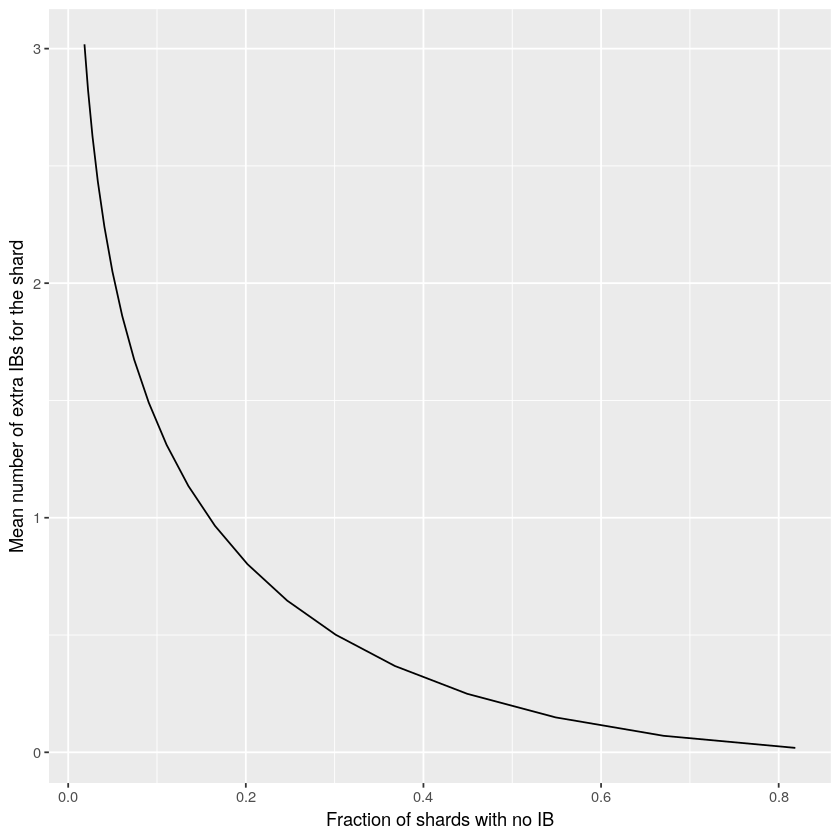

In [5]:
ggplot(results, aes(x=`Fraction of shards with no IB`, y=`Mean number of extra IBs for the shard`)) +
    geom_line()

In [6]:
ggsave("shard-performance.png", units="in", width=8, height=6, dpi=150)

In [7]:
ggsave("shard-performance.svg", units="in", width=8, height=6, dpi=150)